In [0]:
#Estre programa contém os código demonstrados na aula sobre Aplicação de ML+IoT para o Healthcare(previsão de arritmia)

In [1]:
#importando o banco de dados a ser utilizado (comando necessário para o google colab)
from google.colab import files
uploaded = files.upload()

Saving data.csv to data.csv


In [0]:
#importando as bibliotecas
import pandas as pd #biblioteca utilizada para tratar os dados em formato de dataframe
import numpy as np # biblioteca utilizada para tratar vetores e matrizesimport matplotlib.pyplot as plt  #utilizapa para construir os gráficos em um formato similar ao "Matlab"
from sklearn.preprocessing import MinMaxScaler, LabelEncoder #utilizada para realizar o preprocessamento dos dados
from sklearn.model_selection import train_test_split #utilizada para realizar o divisão entre dados para treinamento e teste
from sklearn.metrics import confusion_matrix, accuracy_score #utilizada para verificar a acurácia do modelo construído
from sklearn.naive_bayes import GaussianNB # utilizada para construir o modelo de classificação naive_bayes
import seaborn as sns #utilizada para constuir os gráficos em uma forma mais "bonita"
import matplotlib.pyplot as plt #biblioteca para realizar a construção dos gráficos
from sklearn.svm import SVC #utilizada para importar o algoritmo SVM

In [0]:
#lendo o dataset no formato de um dataframe através da função read do pandas
nomeArquivo = 'data.csv' 
dataset = pd.read_csv(nomeArquivo, sep=',') #realiza a leitura do banco de dados

In [4]:
#print do dataset
dataset.head() # são 76 colunas, mas nem todas serão utilizadas para realizar a previsão de doença cardíaca

,_id,ccf,age,sex,pain location,pain w exertion,relieved after rest,pncaden,chest pain type,resting bp s,hypertension,cholesterol,smoker,cigarettes per day,years of smoking,fasting blood sugar,diabetes,family hist,resting ecg,ekg month,ekg day,ekg yr,digitalis,beta blocker,nitrates,calcium channel blocker,diuretic,exercise protocol,duration of exercise,thaltime,mets achieved,max heart rate,resting heart rate,peak exercise bp 1,peak exercise bp 2,dummy 1,resting bp d,exercise angina,xhypo,oldpeak,ST slope,ST height at rest,ST heaight at peak,flouroscopy,dummy 2,dummy 3,resting ejection fraction,rest wall motion abnormality,exercise ejection fraction,exercsie wall motion,thal,dummy 4,dummy 5,dummy 6,cath month,cath day,cath yr,target,lmt,ladprox,laddist,diag,cxmain,ramus,om1,om2,rcaprox,rcadist,dummy 7,dummy 8,dummy 9,dummy 10,dummy 11,dummy 12,dummy 13,dummy 14
0,1254,0,40,1,1,0,0.0,NaN,2,140.0,0.0,289.0,NaN,NaN,NaN,0.0,NaN,NaN,0.0,12.0,16.0,84.0,0.0,0.0,0.0,0.0,0.0,150.0,18.0,NaN,7.0,172.0,86.0,200.0,110.0,140.0,86.0,0.0,0.0,0.0,NaN,26.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,20.0,84.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN,name
1,1255,0,49,0,1,0,0.0,NaN,3,160.0,1.0,180.0,NaN,NaN,NaN,0.0,NaN,NaN,0.0,11.0,16.0,84.0,0.0,0.0,0.0,0.0,0.0,NaN,10.0,9.0,7.0,156.0,100.0,220.0,106.0,160.0,90.0,0.0,0.0,1.0,2.0,14.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,20.0,84.0,1,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN,name
2,1256,0,37,1,1,0,0.0,NaN,2,130.0,0.0,283.0,NaN,NaN,NaN,0.0,NaN,NaN,1.0,11.0,21.0,84.0,0.0,0.0,0.0,0.0,0.0,100.0,10.0,NaN,5.0,98.0,58.0,180.0,100.0,130.0,80.0,0.0,0.0,0.0,NaN,17.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,26.0,84.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN,name
3,1257,0,48,0,1,1,1.0,NaN,4,138.0,0.0,214.0,NaN,NaN,NaN,0.0,NaN,NaN,0.0,9.0,21.0,84.0,0.0,0.0,0.0,0.0,0.0,50.0,5.0,4.0,4.0,108.0,54.0,210.0,106.0,138.0,86.0,1.0,0.0,1.5,2.0,19.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,30.0,84.0,3,NaN,2.0,NaN,NaN,2.0,NaN,NaN,NaN,2.0,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN,name
4,1258,0,54,1,1,0,1.0,NaN,3,150.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,7.0,25.0,84.0,0.0,0.0,1.0,1.0,0.0,25.0,2.0,NaN,3.0,122.0,74.0,130.0,100.0,150.0,90.0,0.0,1.0,0.0,NaN,13.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,30.0,84.0,0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN,name


In [5]:
dataset.shape # mostra a dimensão do dataset

(617, 76)

In [6]:
#conhecendo o dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 76 columns):
_id                             617 non-null int64
ccf                             617 non-null int64
age                             617 non-null int64
sex                             617 non-null int64
pain location                   617 non-null int64
pain w exertion                 617 non-null int64
relieved after rest             613 non-null float64
pncaden                         0 non-null float64
chest pain type                 617 non-null int64
resting bp s                    558 non-null float64
hypertension                    583 non-null float64
cholesterol                     587 non-null float64
smoker                          230 non-null float64
cigarettes per day              202 non-null float64
years of smoking                190 non-null float64
fasting blood sugar             527 non-null float64
diabetes                        72 non-null float64
family hist

**Existem vários dados nulos**

In [7]:
#tratando os dados nulos
dataset.fillna(dataset.mean(), inplace=True) #substitui os dados que estão como NAN pela média dos valores na coluna
dataset.head()

,_id,ccf,age,sex,pain location,pain w exertion,relieved after rest,pncaden,chest pain type,resting bp s,hypertension,cholesterol,smoker,cigarettes per day,years of smoking,fasting blood sugar,diabetes,family hist,resting ecg,ekg month,ekg day,ekg yr,digitalis,beta blocker,nitrates,calcium channel blocker,diuretic,exercise protocol,duration of exercise,thaltime,mets achieved,max heart rate,resting heart rate,peak exercise bp 1,peak exercise bp 2,dummy 1,resting bp d,exercise angina,xhypo,oldpeak,ST slope,ST height at rest,ST heaight at peak,flouroscopy,dummy 2,dummy 3,resting ejection fraction,rest wall motion abnormality,exercise ejection fraction,exercsie wall motion,thal,dummy 4,dummy 5,dummy 6,cath month,cath day,cath yr,target,lmt,ladprox,laddist,diag,cxmain,ramus,om1,om2,rcaprox,rcadist,dummy 7,dummy 8,dummy 9,dummy 10,dummy 11,dummy 12,dummy 13,dummy 14
0,1254,0,40,1,1,0,0.0,NaN,2,140.0,0.0,289.000000,0.517391,22.133663,23.952632,0.0,0.944444,0.482051,0.0,12.0,16.0,84.0,0.0,0.0,0.0,0.0,0.0,150.000000,18.0,6.428755,7.0,172.0,86.0,200.0,110.0,140.0,86.0,0.0,0.0,0.0,1.932039,26.0,20.0,1.545455,NaN,0.0,0.531071,1.033333,0.55,0.2,5.690141,1.284615,0.295455,0.0,12.0,20.0,84.0,0,1.555556,1.464567,1.280323,1.202346,1.400524,1.114458,1.187861,1.067278,1.47043,1.207493,1.0,1.0,1.0,1.0,1.0,27.623119,5.869748,name
1,1255,0,49,0,1,0,0.0,NaN,3,160.0,1.0,180.000000,0.517391,22.133663,23.952632,0.0,0.944444,0.482051,0.0,11.0,16.0,84.0,0.0,0.0,0.0,0.0,0.0,57.229703,10.0,9.000000,7.0,156.0,100.0,220.0,106.0,160.0,90.0,0.0,0.0,1.0,2.000000,14.0,13.0,1.545455,NaN,0.0,0.531071,1.033333,0.55,0.2,5.690141,1.284615,0.295455,0.0,11.0,20.0,84.0,1,1.555556,1.464567,2.000000,1.202346,1.400524,1.114458,1.187861,1.067278,1.47043,1.207493,1.0,1.0,1.0,1.0,1.0,27.623119,5.869748,name
2,1256,0,37,1,1,0,0.0,NaN,2,130.0,0.0,283.000000,0.517391,22.133663,23.952632,0.0,0.944444,0.482051,1.0,11.0,21.0,84.0,0.0,0.0,0.0,0.0,0.0,100.000000,10.0,6.428755,5.0,98.0,58.0,180.0,100.0,130.0,80.0,0.0,0.0,0.0,1.932039,17.0,14.0,1.545455,NaN,0.0,0.531071,1.033333,0.55,0.2,5.690141,1.284615,0.295455,0.0,11.0,26.0,84.0,0,1.555556,1.464567,1.280323,1.202346,1.400524,1.114458,1.187861,1.067278,1.47043,1.207493,1.0,1.0,1.0,1.0,1.0,27.623119,5.869748,name
3,1257,0,48,0,1,1,1.0,NaN,4,138.0,0.0,214.000000,0.517391,22.133663,23.952632,0.0,0.944444,0.482051,0.0,9.0,21.0,84.0,0.0,0.0,0.0,0.0,0.0,50.000000,5.0,4.000000,4.0,108.0,54.0,210.0,106.0,138.0,86.0,1.0,0.0,1.5,2.000000,19.0,22.0,1.545455,NaN,0.0,0.531071,1.033333,0.55,0.2,5.690141,1.284615,0.295455,0.0,9.0,30.0,84.0,3,1.555556,2.000000,1.280323,1.202346,2.000000,1.114458,1.187861,1.067278,2.00000,1.207493,1.0,1.0,1.0,1.0,1.0,27.623119,5.869748,name
4,1258,0,54,1,1,0,1.0,NaN,3,150.0,0.0,174.579216,0.517391,22.133663,23.952632,0.0,0.944444,0.482051,0.0,7.0,25.0,84.0,0.0,0.0,1.0,1.0,0.0,25.000000,2.0,6.428755,3.0,122.0,74.0,130.0,100.0,150.0,90.0,0.0,1.0,0.0,1.932039,13.0,9.0,1.545455,NaN,0.0,0.531071,1.033333,0.55,0.2,5.690141,1.284615,0.295455,0.0,7.0,30.0,84.0,0,1.555556,1.464567,1.280323,1.202346,1.000000,1.114458,1.187861,1.067278,1.00000,1.207493,1.0,1.0,1.0,1.0,1.0,27.623119,5.869748,name


**Preparando os dados**

In [0]:
dataset_to_array = np.array(dataset) #transforma o dataframe em array para facilitar a escolha dos dados a serem utilizados

In [10]:
target = dataset_to_array[:,57] # esse é o vetor de saída (target)
target= target.astype('int') #indica o tipo de dados
#target[target>0] = 1 # 0 para o coração saudável e 1 para problema detectado
target

array([0, 1, 0, 3, 0, 0, 0, 0, 1, 0, 0, 3, 0, 3, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 3, 0, 0, 0, 0, 0, 0, 3, 0, 1, 3, 0, 0, 1, 0, 0, 0, 0, 4, 0, 0,
       3, 0, 0, 0, 0, 1, 2, 4, 0, 0, 0, 0, 1, 1, 0, 3, 0, 0, 0, 1, 0, 0,
       0, 0, 3, 0, 1, 0, 2, 0, 2, 0, 2, 0, 0, 1, 0, 0, 1, 0, 2, 3, 3, 0,
       2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 4, 0, 2, 1, 1, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 1, 1, 1, 0, 1, 3, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 1,
       3, 3, 0, 1, 0, 0, 2, 1, 4, 4, 4, 0, 3, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 4, 2, 0, 3, 0, 3, 4, 0, 0, 0, 0, 3, 4, 0, 0, 0, 0, 0, 0, 0, 4,
       4, 3, 0, 0, 0, 1, 0, 3, 0, 0, 2, 0, 1, 0, 3, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 2, 0, 0,
       0, 2, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 4, 3, 2, 2, 0,
       2, 3, 0, 1, 0, 2, 2, 2, 3, 4, 1, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 2,
       3, 1, 0, 3, 0, 2, 0, 0, 0, 1, 0, 0, 0, 3, 2, 0, 0, 0, 4, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 3, 4, 2,

**Iniciando a previsão**

In [0]:
#dados coletados pelos sensores
dataset_sensor = np.column_stack(( 
    dataset_to_array[:,11], # pressão sanguínea em repouso
    dataset_to_array[:,33], # frequencia máxima atingida
    dataset_to_array[:,34], # frequencia cardíaca em repouso
    dataset_to_array[:,35], # pico de pressão sanguínea durante exercício 
    dataset_to_array[:,36], # pico de pressão sanguínea durante exercício  
    dataset_to_array[:,38] # pressão sanguínea em repouso
 ))

In [0]:
#dataset com os dados médicos do paciente
dataset_medico = np.column_stack((dataset_to_array[:,4] , # localização da dor
    dataset_to_array[:,6] , # alivio após o cansaço
    dataset_to_array[:,9] , # tipo de dor 
    dataset_to_array[:,39], # angina induzida pelo exercício (1 = sim; 0 = nao) 
    dataset.age, # idade 
    dataset.sex , # sexo
    dataset.hypertension # hipertensão
 ))

In [13]:
#concatena as duas bases de dados
dataset_paciente=np.concatenate((dataset_medico,dataset_sensor),axis=1)
dataset_paciente

array([[1, 0.0, 140.0, ..., 140.0, 86.0, 0.0],
       [1, 0.0, 160.0, ..., 160.0, 90.0, 0.0],
       [1, 0.0, 130.0, ..., 130.0, 80.0, 0.0],
       ...,
       [1, 1.0, 122.0, ..., 122.0, 70.0, 0.0],
       [1, 1.0, 132.37275985663084, ..., 132.37275985663084,
        82.80465949820788, 0.028622540250447227],
       [1, 0.0, 120.0, ..., 120.0, 80.0, 0.0]], dtype=object)

In [14]:
dataset_paciente.shape

(617, 13)

In [0]:
#encontrando os dados para treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(dataset_paciente, target, random_state = 223)

In [0]:
#cria o objeto SVM
modelSVM = SVC(kernel = 'linear') #escolha do kernel polinomial

In [18]:
#aplica o treinamento ao modelo
modelSVM.fit(X_train, y_train)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

**Analisando a performance do modelo**

In [0]:
previsao = modelSVM.predict(X_test) #aplica o modelo para os dados de teste

In [20]:
#encontra a acuracia do modelo de previsão utilizando o SVM 
accuracia = accuracy_score(y_test, previsao)
print ("Acuracia utilizando o SVM :" , accuracia , "\nEm porcentagem : ", round(accuracia*100) , "%\n")

Acuracia utilizando o SVM : 0.5419354838709678 
Em porcentagem :  54.0 %



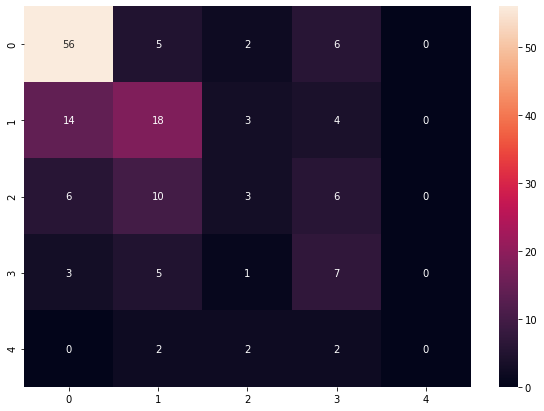

In [21]:
#criando a matriz de confusão
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, previsao) #gera a matriz de confusão
df_cm = pd.DataFrame(cm, index = [i for i in "01234"],columns = [i for i in "01234"]) #cria o df com as classes
plt.figure(figsize = (10,7)) #indica o tamanho da figura 
sn.heatmap(df_cm, annot=True) #plota a figura


**Modificando o Dataset**

In [0]:
#vamos escolher apenas 13 atributos para realizar a previsão de doenças cardíacas

dataset_to_array = np.array(dataset)
label = dataset_to_array[:,57] # "Target" classes binárias 0 e 1
label = label.astype('int')
label[label>0] = 1 # Quando os dados são 0 está saldável e 1 doente

In [23]:
label

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,

In [0]:
#encontrando os dados para treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(dataset_paciente, label, random_state = 223)

In [0]:
#cria o objeto SVM
modelSVM = SVC(kernel = 'linear') #escolha do kernel polinomial

In [26]:
#aplica o treinamento ao modelo
modelSVM.fit(X_train, y_train)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
previsao = modelSVM.predict(X_test) #aplica o modelo para os dados de teste

In [28]:
#encontra a acuracia do modelo de previsão utilizando o SVM 
accuracia = accuracy_score(y_test, previsao)
print ("Acuracia utilizando o SVM :" , accuracia , "\nEm porcentagem : ", round(accuracia*100) , "%\n")

Acuracia utilizando o SVM : 0.7419354838709677 
Em porcentagem :  74.0 %



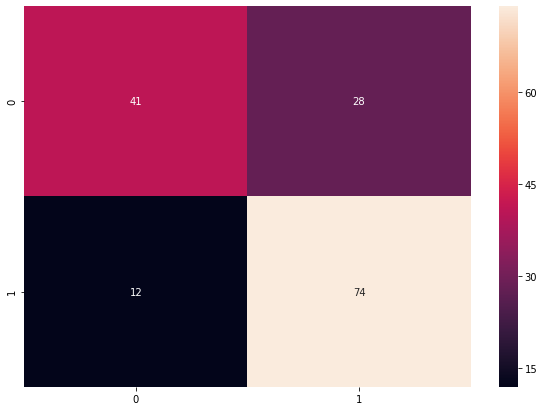

In [29]:
#criando a matriz de confusão
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, previsao) #gera a matriz de confusão
df_cm = pd.DataFrame(cm, index = [i for i in "01"],columns = [i for i in "01"]) #cria o df com as classes
plt.figure(figsize = (10,7)) #indica o tamanho da figura 
sn.heatmap(df_cm, annot=True) #plota a figura
